# Необычные модели Playboy, или про обнаружение выбросов в данных c помощью Scikit-learn

## Загрузка и первичный анализ данных

In [1]:
%pylab inline
import pandas as pd
from sklearn.preprocessing import scale
from sklearn import svm
from scipy import stats
from sklearn.decomposition import PCA

Populating the interactive namespace from numpy and matplotlib


Процент "выбросов", задаваемый пользователем. Ищем 1% выбросов в данных, то есть ограничимся 6-7 «странными» девушками. (Переменные в Питоне, записанные в верхнем регистре, символизируют константы и обычно записываются в начале файла после подключения модулей).

In [2]:
OUTLIER_FRACTION = 0.01

Создаем DataFrame Pandas

In [7]:
girls = pd.read_csv('girls.csv', header=0)

Посмотрим общую статистику девушек

In [8]:
girls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604 entries, 0 to 603
Data columns (total 7 columns):
Month     604 non-null object
Year      604 non-null int64
Bust      604 non-null int64
Waist     604 non-null int64
Hips      604 non-null int64
Height    604 non-null int64
Weight    604 non-null int64
dtypes: int64(6), object(1)
memory usage: 37.8+ KB


Дальше узнаем про девушек побольше

In [9]:
girls.describe()

,Year,Bust,Waist,Hips,Height,Weight
count,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000
mean,1983.057947,89.293046,59.529801,87.942053,167.887417,52.168874
std,14.843740,3.994011,3.616909,3.479142,5.776711,4.040585
min,1953.000000,81.000000,46.000000,61.000000,150.000000,42.000000
25%,1970.000000,86.000000,58.000000,86.000000,165.000000,49.000000
50%,1983.000000,89.000000,61.000000,89.000000,168.000000,52.000000
75%,1996.000000,91.000000,61.000000,91.000000,173.000000,54.000000
max,2009.000000,104.000000,89.000000,99.000000,188.000000,68.000000


Посмотрим на выбросы, которые бросаются в глаза

In [24]:
girls[['Month','Year']][girls['Waist'] == 89]

,Month,Year
483,December,1998


Для красоты можно еще построить и гистограммы распределения параметров девушек

Распределение охвата груди

(array([  21.,    0.,    0.,    0.,    0.,    6.,    2.,    0.,  214.,
           0.,    0.,    0.,    3.,   86.,    0.,    9.,    0.,  169.,
           0.,    0.,    5.,    0.,   36.,    0.,    3.,    0.,    0.,
          28.,    0.,    1.,    0.,   15.,    0.,    0.,    0.,    0.,
           5.,    0.,    0.,    1.]),
 array([  81.   ,   81.575,   82.15 ,   82.725,   83.3  ,   83.875,
          84.45 ,   85.025,   85.6  ,   86.175,   86.75 ,   87.325,
          87.9  ,   88.475,   89.05 ,   89.625,   90.2  ,   90.775,
          91.35 ,   91.925,   92.5  ,   93.075,   93.65 ,   94.225,
          94.8  ,   95.375,   95.95 ,   96.525,   97.1  ,   97.675,
          98.25 ,   98.825,   99.4  ,   99.975,  100.55 ,  101.125,
         101.7  ,  102.275,  102.85 ,  103.425,  104.   ]),
 <a list of 40 Patch objects>)

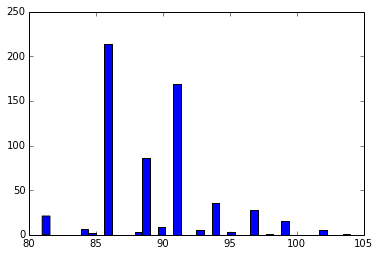

In [40]:
hist(girls['Bust'], bins=40, facecolor='blue')

Распределение охвата талии

(array([   2.,    2.,    0.,    0.,   10.,    0.,   23.,    0.,    2.,
          91.,    5.,  140.,    0.,  232.,   10.,    0.,   63.,    0.,
          17.,    0.,    0.,    4.,    0.,    2.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    1.]),
 array([ 46.   ,  47.075,  48.15 ,  49.225,  50.3  ,  51.375,  52.45 ,
         53.525,  54.6  ,  55.675,  56.75 ,  57.825,  58.9  ,  59.975,
         61.05 ,  62.125,  63.2  ,  64.275,  65.35 ,  66.425,  67.5  ,
         68.575,  69.65 ,  70.725,  71.8  ,  72.875,  73.95 ,  75.025,
         76.1  ,  77.175,  78.25 ,  79.325,  80.4  ,  81.475,  82.55 ,
         83.625,  84.7  ,  85.775,  86.85 ,  87.925,  89.   ]),
 <a list of 40 Patch objects>)

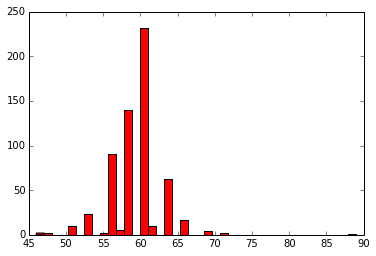

In [48]:
hist(girls['Waist'], bins=40, label="Wasit", facecolor='red')

Распределение охвата бедер

(array([   1.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,    1.,
           0.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,
           1.,    0.,    1.,   27.,    0.,    0.,   33.,    6.,  190.,
           0.,    6.,  162.,    6.,  140.,    0.,    4.,   17.,    1.,
           0.,    4.,    0.,    2.]),
 array([ 61.  ,  61.95,  62.9 ,  63.85,  64.8 ,  65.75,  66.7 ,  67.65,
         68.6 ,  69.55,  70.5 ,  71.45,  72.4 ,  73.35,  74.3 ,  75.25,
         76.2 ,  77.15,  78.1 ,  79.05,  80.  ,  80.95,  81.9 ,  82.85,
         83.8 ,  84.75,  85.7 ,  86.65,  87.6 ,  88.55,  89.5 ,  90.45,
         91.4 ,  92.35,  93.3 ,  94.25,  95.2 ,  96.15,  97.1 ,  98.05,  99.  ]),
 <a list of 40 Patch objects>)

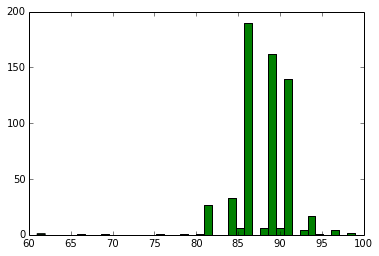

In [41]:
hist(girls['Hips'], bins=40, label="Wasit", facecolor='green')

Распределение роста

(array([  2.,   0.,   4.,   0.,   1.,   5.,   0.,  27.,   0.,   4.,  35.,
          1.,   0.,  54.,  13.,  84.,  17.,   0.,  84.,   0.,   5.,  95.,
          9.,   0.,  78.,  19.,  31.,   0.,   5.,  18.,   1.,   9.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   1.]),
 array([ 150.  ,  150.95,  151.9 ,  152.85,  153.8 ,  154.75,  155.7 ,
         156.65,  157.6 ,  158.55,  159.5 ,  160.45,  161.4 ,  162.35,
         163.3 ,  164.25,  165.2 ,  166.15,  167.1 ,  168.05,  169.  ,
         169.95,  170.9 ,  171.85,  172.8 ,  173.75,  174.7 ,  175.65,
         176.6 ,  177.55,  178.5 ,  179.45,  180.4 ,  181.35,  182.3 ,
         183.25,  184.2 ,  185.15,  186.1 ,  187.05,  188.  ]),
 <a list of 40 Patch objects>)

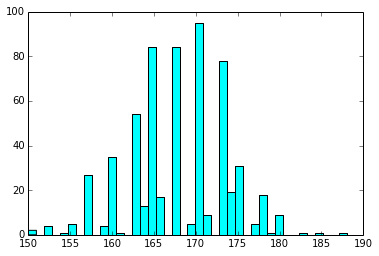

In [44]:
hist(girls['Height'], bins=40, label="Wasit", facecolor='cyan')

Распределение веса

(array([   1.,    6.,    0.,    8.,   16.,    0.,   12.,   20.,    0.,
          51.,   43.,    0.,   68.,   30.,    0.,   69.,   35.,    0.,
         117.,    0.,   11.,   23.,    0.,   46.,   11.,    0.,   19.,
           3.,    0.,    6.,    1.,    0.,    1.,    4.,    0.,    1.,
           1.,    0.,    0.,    1.]),
 array([ 42.  ,  42.65,  43.3 ,  43.95,  44.6 ,  45.25,  45.9 ,  46.55,
         47.2 ,  47.85,  48.5 ,  49.15,  49.8 ,  50.45,  51.1 ,  51.75,
         52.4 ,  53.05,  53.7 ,  54.35,  55.  ,  55.65,  56.3 ,  56.95,
         57.6 ,  58.25,  58.9 ,  59.55,  60.2 ,  60.85,  61.5 ,  62.15,
         62.8 ,  63.45,  64.1 ,  64.75,  65.4 ,  66.05,  66.7 ,  67.35,  68.  ]),
 <a list of 40 Patch objects>)

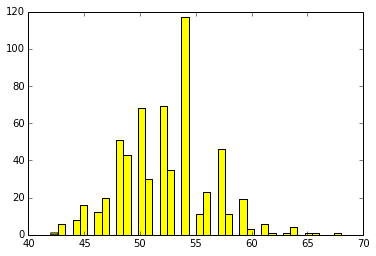

In [42]:
hist(girls['Weight'], bins=40, label="Wasit", facecolor='yellow')

## Предобработка данных

Оставляем только столбцы с численными данными

In [11]:
girl_params = np.array(girls.values[:,2:], dtype="float64")

Шкалируем данные

In [12]:
girl_params = scale(girl_params) 

Выделяем в них две главные компоненты

In [13]:
X = PCA(n_components=2).fit_transform(girl_params)

Число девушек 

In [50]:
girls_num = X.shape[0]
girls_num

604

## Обучение модели

Для обнаружения «выбросов» в данных используем одноклассовую модель машины опорных векторов. 
Создаем SVM классификатор с гауссовым ядром

In [51]:
svm_clf = svm.OneClassSVM(kernel="rbf")

"Скармливаем" ему данные

In [52]:
svm_clf.fit(X)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.0, kernel='rbf',
      max_iter=-1, nu=0.5, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

В результате обучения алгоритма получаем вектор
индикаторов, является ли объект "выбросом"

## Поиск выбросов

In [19]:
dist_to_border = svm_clf.decision_function(X).ravel()
threshold = stats.scoreatpercentile(dist_to_border,
            100 * OUTLIER_FRACTION)
is_inlier = dist_to_border > threshold

## Отображение и трактовка результатов

Визуализация (без детальных комментариев)

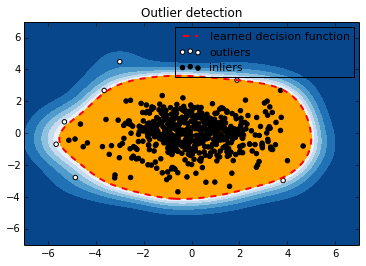

In [20]:
xx, yy = np.meshgrid(np.linspace(-7, 7, 500), np.linspace(-7, 7, 500))
n_inliers = int((1. - OUTLIER_FRACTION) * girls_num)
n_outliers = int(OUTLIER_FRACTION * girls_num)
Z = svm_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Outlier detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                         cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[threshold],
                            linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                         colors='orange')
b = plt.scatter(X[is_inlier == 0, 0], X[is_inlier == 0, 1], c='white')
c = plt.scatter(X[is_inlier == 1, 0], X[is_inlier == 1, 1], c='black')
plt.axis('tight')
plt.legend([a.collections[0], b, c],
           ['learned decision function', 'outliers', 'inliers'],
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlim((-7, 7))
plt.ylim((-7, 7))
plt.show()

Смотрим на "выбросы" - девушек с параметрами, отличающимися от средних

In [47]:
girls[is_inlier == 0]

,Month,Year,Bust,Waist,Hips,Height,Weight
54,September,1962,91,46,86,152,45
67,October,1963,94,66,94,183,68
79,October,1964,104,64,97,168,66
173,September,1972,98,64,99,185,64
483,December,1998,86,89,86,173,52
507,December,2000,86,66,91,188,61
535,April,2003,86,61,69,173,54
